In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("DS2_C5_S4_Wine_Data_Practice.data",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 14)

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


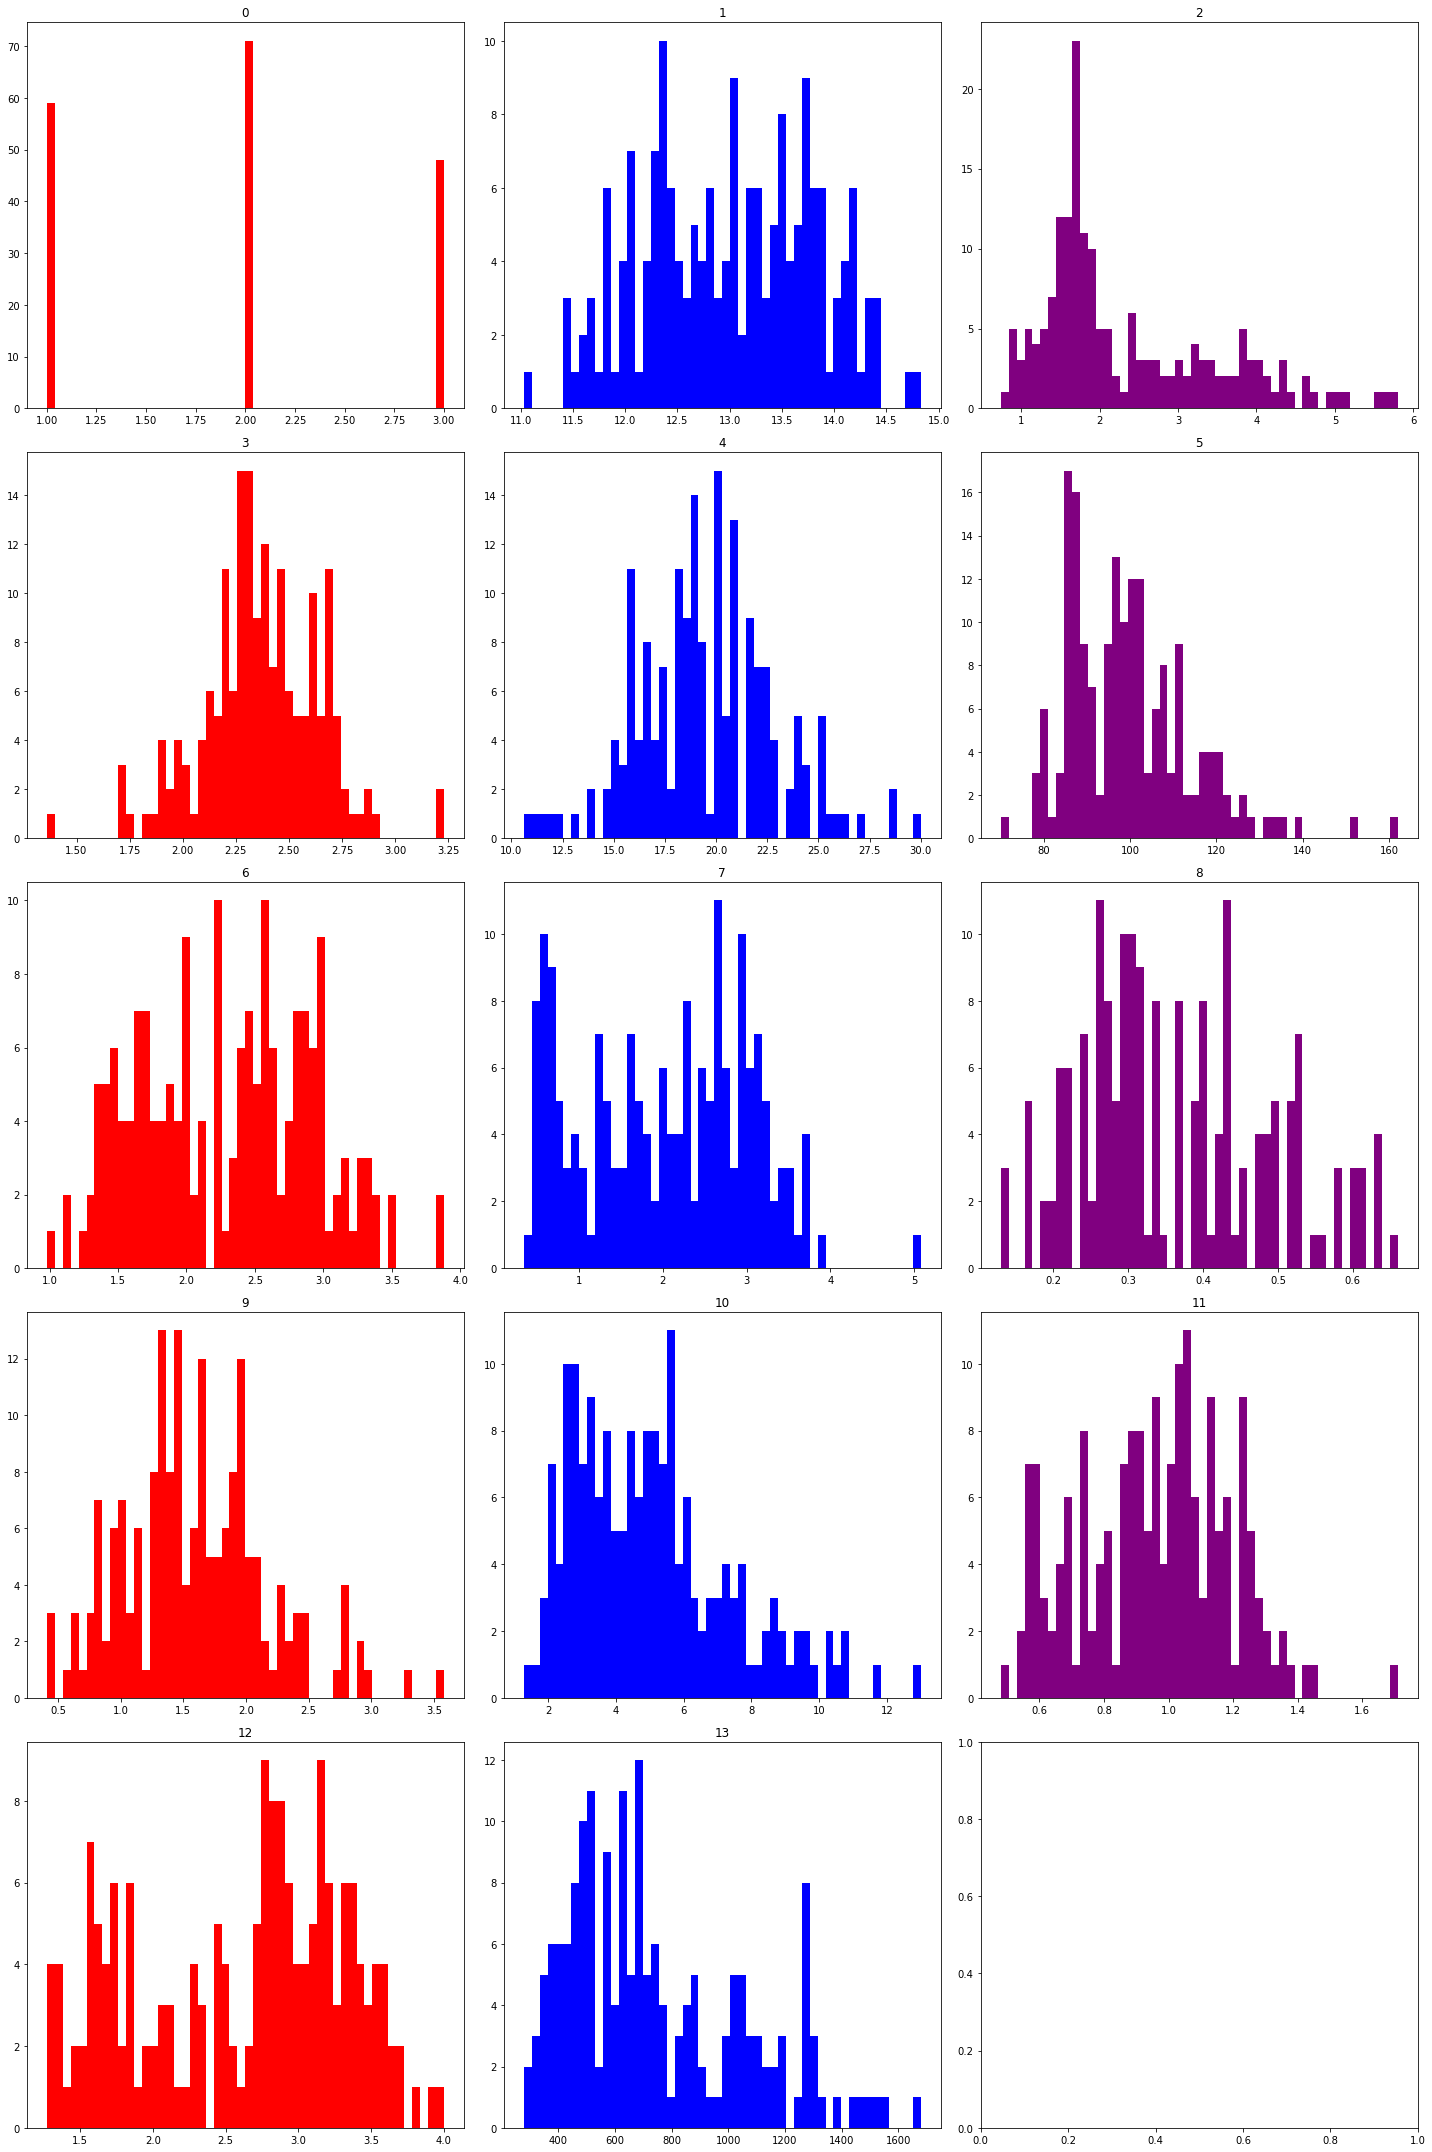

In [66]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = df.select_dtypes(include=numerics)
numeric_cols=new_df.columns
num_cols=3
n_bins = 50

# compute number of rows for plot
num_rows= int(len(numeric_cols)/num_cols)+1
# setting canvas for plotting

fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,30))
# plotting the numerical columns

col=['red','blue','purple']*5
for col, ax,i in zip(numeric_cols,axs.flatten()[:len(numeric_cols)],col):
    ax.hist(new_df[col],bins=n_bins,color=i)
    ax.set_title(col)
plt.show()

# TASK2

In [6]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [7]:
scaler=StandardScaler()
arr=scaler.fit_transform(df)

In [8]:
DF=pd.DataFrame(arr,columns=df.columns)

In [9]:
DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [10]:
corr=DF.corr()

In [11]:
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
1,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
2,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
3,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
4,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
5,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
6,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
7,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
8,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
9,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [12]:
X=DF.iloc[:,1:]

In [13]:
y=df[0]

In [14]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [43]:
classifier.predict([[14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065]])

array([1], dtype=int64)

# TASK3

In [15]:
classifier = GaussianNB()
classifier.fit(X_train, y_train) 

GaussianNB()

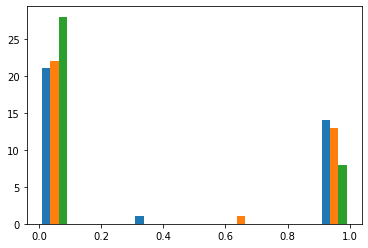

In [16]:
prob=classifier.predict_proba(X_test)
plt.hist(prob);

In [17]:
classifier.score(X_test,y_test)

1.0

In [18]:
classifier.score(X_train,y_train)

0.971830985915493

In [19]:
pred=classifier.predict(X_test)
pred

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1], dtype=int64)

In [21]:
accuracy_score(y_test,pred)

1.0

In [24]:
CM=confusion_matrix(y_test,pred)
CM

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]], dtype=int64)

# Task4

In [25]:
from sklearn import tree

In [26]:
model=tree.DecisionTreeClassifier()

In [27]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
pred=model.predict(X_test)
pred

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1], dtype=int64)

In [29]:
model.score(X_test,y_test)

0.9444444444444444

In [30]:
model.score(X_train,y_train)

1.0

In [31]:
accuracy_score(y_test,pred)

0.9444444444444444

In [32]:
CM2=confusion_matrix(y_test,pred)
CM2

array([[13,  1,  0],
       [ 0, 14,  0],
       [ 0,  1,  7]], dtype=int64)

# TASK5

In [33]:
CM #diagonally is True +ive and rest False (+ive,-ive) 

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]], dtype=int64)

In [34]:
CM2

array([[13,  1,  0],
       [ 0, 14,  0],
       [ 0,  1,  7]], dtype=int64)

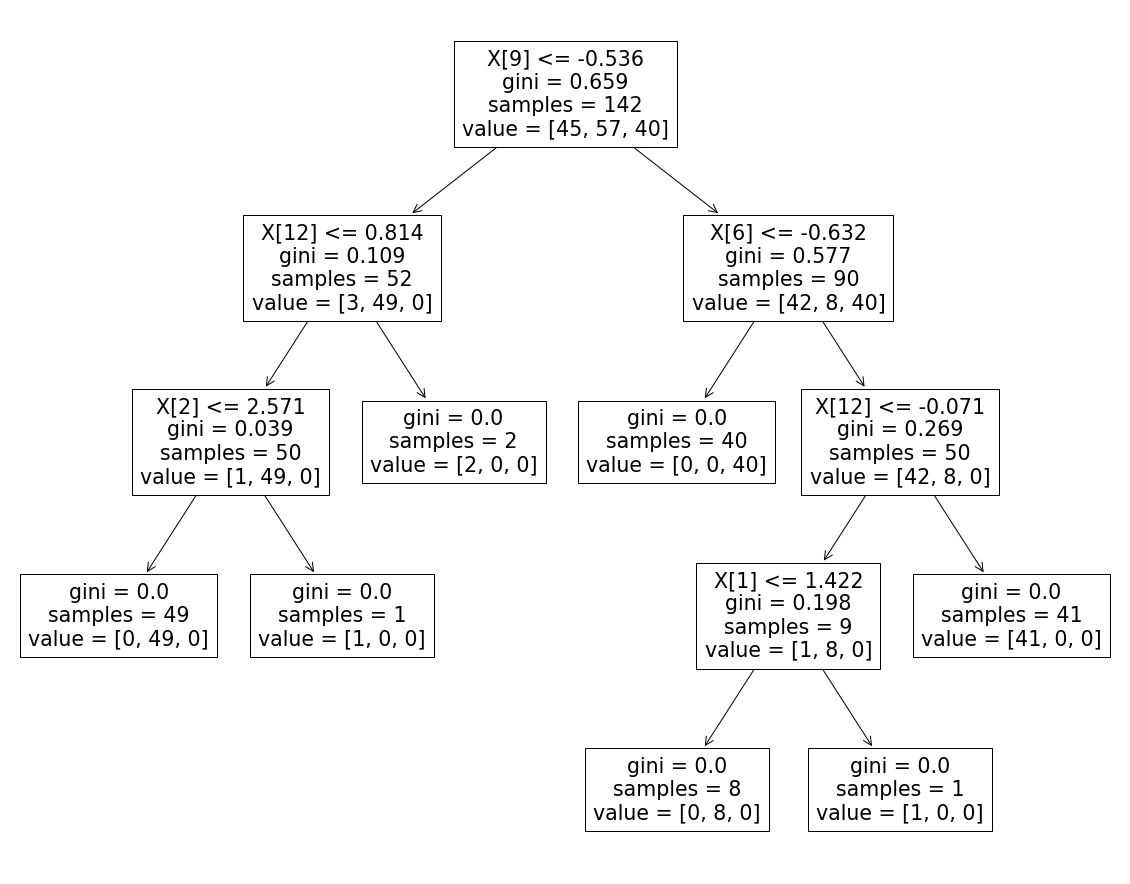

In [45]:
plt.figure(figsize=(20,16))
tree.plot_tree(model);